In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pip install folium
import folium 

SyntaxError: invalid syntax (447954028.py, line 5)

In [85]:
df = pd.read_csv('./resources/p2-arbres-fr.csv', delimiter=";")

# 01 General presentation of the dataset
## First previsualization of this data frame

In [6]:
df.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [56]:
df.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [36]:
df.columns.tolist()

['id',
 'type_emplacement',
 'domanialite',
 'arrondissement',
 'complement_addresse',
 'numero',
 'lieu',
 'id_emplacement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'circonference_cm',
 'hauteur_m',
 'stade_developpement',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

In [11]:
df['id_emplacement'].count()

200137

In [35]:
df.columns()

TypeError: 'Index' object is not callable

We can say that this dataset has 200,137 trees. Let the city of Paris contain 200,137 trees in total

In [34]:
df['id','libelle_francais', 'espece'].groupby(['libelle_francais']).count('libelle_francais')

KeyError: ('id', 'libelle_francais', 'espece')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

# Filtre 

Étude des valeurs manquantes


In [81]:
missing_values = df.isnull().sum()
print(missing_values)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169152
numero                 200029
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163259
circonference_cm            0
hauteur_m                   0
stade_developpement     67203
remarquable             63097
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


Stratégie de remplacement / suppression des valeurs manquante

In [86]:
df = df[(df['libelle_francais'].isnull() != 1)]

Vérification après application de la stratégie

In [87]:
missing_values = df.isnull().sum()
print(missing_values)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    168077
numero                 198640
lieu                        0
id_emplacement              0
libelle_francais            0
genre                       0
espece                   1387
variete                162575
circonference_cm            0
hauteur_m                   0
stade_developpement     66857
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


In [96]:
outliers = df[(df['hauteur_m'] > 115.55) | (df['circonference_cm'] > 3500)]
print("Valeurs aberrantes:")
outliers[['hauteur_m', 'circonference_cm']]

Valeurs aberrantes:


,hauteur_m,circonference_cm
5392,1510,100
6473,117,112
12536,255,47
15373,810,145
24099,125,130
...,...,...
187873,120,10
187874,120,10
189053,150,60
189441,157,8


# Filtre de valeurs abérantes

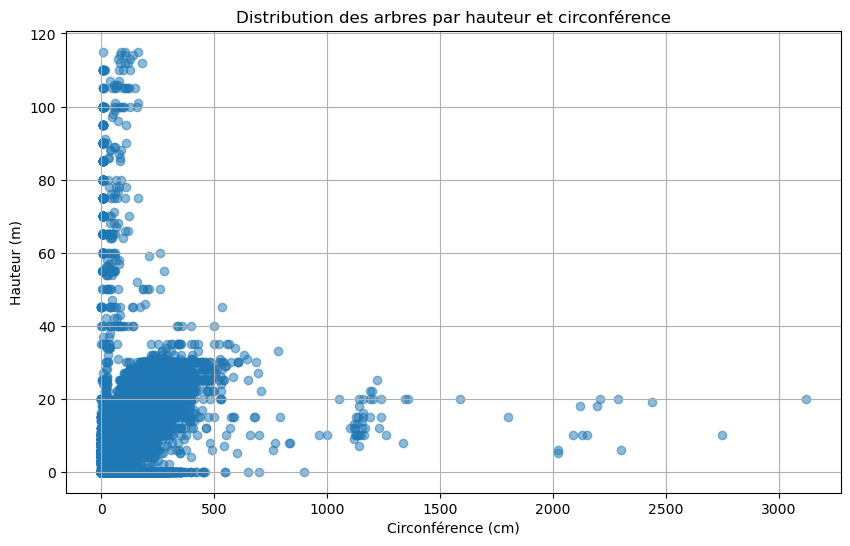

In [80]:
filtered_df = df[(df['hauteur_m'] <= 115.55) & (df['circonference_cm'] <= 3500)]

# Créer un scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['circonference_cm'], filtered_df['hauteur_m'], alpha=0.5)
plt.title('Distribution des arbres par hauteur et circonférence')
plt.xlabel('Circonférence (cm)')
plt.ylabel('Hauteur (m)')
plt.grid(True)
plt.show()

df = filtered_df

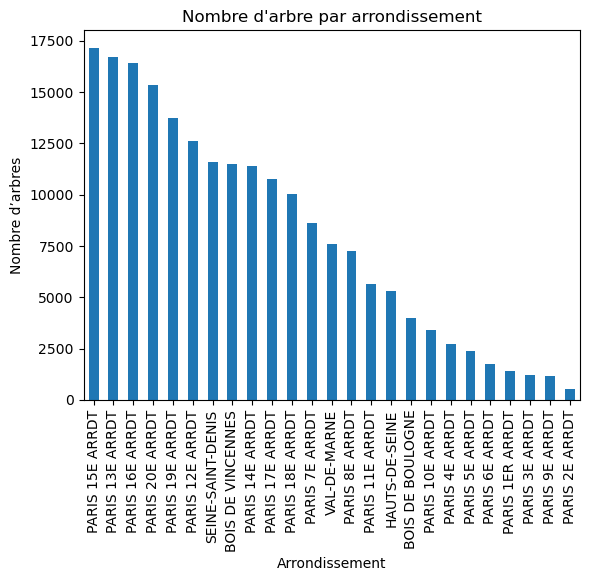

<Axes: >

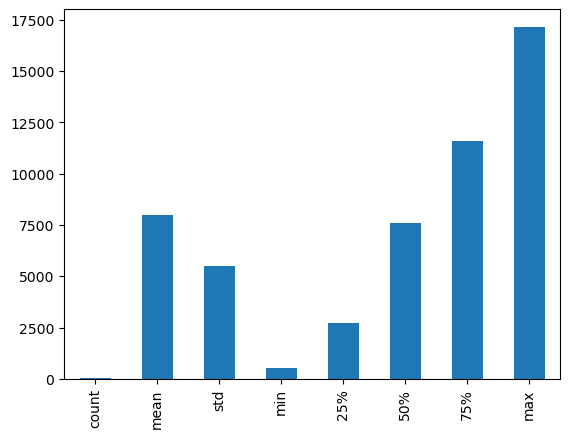

In [45]:
test = df['arrondissement'].value_counts().plot(kind='bar')
plt.title("Nombre d'arbre par arrondissement")
plt.ylabel('Nombre d’arbres')
plt.xlabel('Arrondissement')
plt.show()

test = df['arrondissement'].value_counts()

test.describe().plot(kind='bar')


In [63]:
pip install folium

     ---------------------------------------- 102.3/102.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
import folium

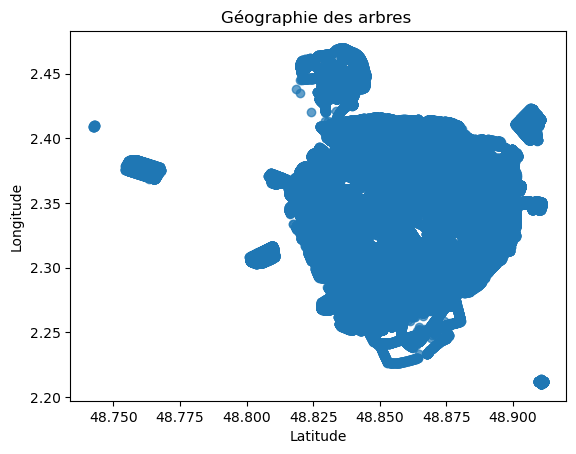

In [59]:
plt.scatter(df['geo_point_2d_a'], df['geo_point_2d_b'], alpha=0.7)
plt.title('Géographie des arbres ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [65]:
df_remarquable = df[df['remarquable'] == 1]
print(f"Nombre total d'arbres remarquables : {len(df_remarquable)}")

Nombre total d'arbres remarquables : 184


Regarder les hauteur trop, circonférence .... 



Analyse par type, variéter, nuage de points, box plot ...

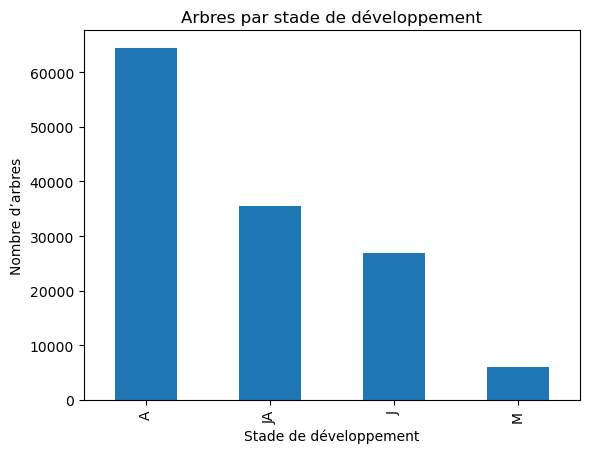

In [58]:
df['stade_developpement'].value_counts().plot(kind='bar')
plt.title('Arbres par stade de développement')
plt.ylabel('Nombre d’arbres')
plt.xlabel('Stade de développement')
plt.show()

In [51]:
pip install ortools

     --------------------------------------- 44.9/44.9 MB 26.1 MB/s eta 0:00:00
     ---------------------------------------- 130.2/130.2 kB ? eta 0:00:00
     ---------------------------------------- 430.5/430.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model(points):
    """Crée la matrice de distance."""
    matrix = {}
    num_points = len(points)
    for from_idx in range(num_points):
        matrix[from_idx] = {}
        for to_idx in range(num_points):
            if from_idx == to_idx:
                matrix[from_idx][to_idx] = 0
            else:
                dx = points[to_idx][0] - points[from_idx][0]
                dy = points[to_idx][1] - points[from_idx][1]
                matrix[from_idx][to_idx] = int((dx**2 + dy**2)**0.5)
    return matrix

def main():
    # Supposons que les points correspondent à df['geo_point_2d_a'], df['geo_point_2d_b']
    points = list(zip(df['geo_point_2d_a'], df['geo_point_2d_b']))

    data = create_data_model(points)

    # Création du problème de routage et du solveur.
    manager = pywrapcp.RoutingIndexManager(len(data), 1, 0)
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        return data[manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Définissez les coûts de chaque arête.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Configuration de la recherche.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 30
    search_parameters.log_search = True

    # Résolution du problème.
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(manager, routing, solution)

def print_solution(manager, routing, solution):
    print('Distance totale: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Parcours:\n'
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)

main()


KeyboardInterrupt: 

In [68]:
import folium

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

def create_data_model(points):
    # modeling....
    matrix = {}
    # Nomnre de  points passer en paramètere
    num_points = len(points)
    
    # Etablissons la chaine, calculons la distance eucli entre 2 paire de point pour pouvoir les classer après...
    for from_idx in range(num_points):
        # On instancie un objet pour l'instant vide dans chaque clef 
        matrix[from_idx] = {}
        for to_idx in range(num_points):
            
            if from_idx == to_idx:
                matrix[from_idx][to_idx] = 0
            else:
                dx = points[to_idx][0] - points[from_idx][0]
                dy = points[to_idx][1] - points[from_idx][1]
                matrix[from_idx][to_idx] = int((dx**2 + dy**2)**0.5)
    return matrix

def plot_route_on_map(df, route):
    """
    Trace la route optimisée sur une carte à l'aide de folium.

    Args:
    - df (DataFrame): le DataFrame contenant les données des arbres.
    - route (list): la liste des indices des points dans l'ordre du trajet.
    """

    # Prendre la latitude et la longitude moyennes pour centrer la carte
    mean_lat = df['geo_point_2d_a'].mean()
    mean_lon = df['geo_point_2d_b'].mean()

    # Initialiser la carte
    m = folium.Map(location=[mean_lat, mean_lon], zoom_start=14)

    # Ajouter les points à la carte
    for idx in route:
        folium.Marker(
            location=[df.iloc[idx]['geo_point_2d_a'], df.iloc[idx]['geo_point_2d_b']],
            popup=str(idx),
            icon=folium.Icon(color='blue')
        ).add_to(m)

    # Ajouter le trajet à la carte
    latlng_route = [(df.iloc[idx]['geo_point_2d_a'], df.iloc[idx]['geo_point_2d_b']) for idx in route]
    folium.PolyLine(latlng_route, color="blue", weight=2.5, opacity=1).add_to(m)

    return m

def print_solution(manager, routing, solution, df_sample):
    """
    Modifie la fonction d'impression pour inclure le tracé sur la carte.
    """

    print('Distance totale: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    route = []

    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
    route.append(manager.IndexToNode(index))

    # Affiche la route sur la carte
    map_display = plot_route_on_map(df_sample, route)
    display(map_display)

def main(df):
    # Prend les 500 premières lignes
    df_sample = df.head(500)

    # Création des points à partir du DataFrame (500 first lines)
    points = list(zip(df_sample['geo_point_2d_a'], df_sample['geo_point_2d_b']))
    data = create_data_model(points)

    manager = pywrapcp.RoutingIndexManager(len(data), 1, 0)
    routing = pywrapcp.RoutingModel(manager)

    def distance_callback(from_index, to_index):
        return data[manager.IndexToNode(from_index)][manager.IndexToNode(to_index)]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Configuration de la recherche avec une limite de temps de 20 secondes.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.time_limit.seconds = 200
    search_parameters.log_search = True

    
    solution = routing.SolveWithParameters(search_parameters)
    if solution:
        print_solution(manager, routing, solution, df_sample)

def print_solution(manager, routing, solution, df_sample):
    """
    Modifie la fonction d'impression pour inclure le tracé sur la carte.
    """

    print('Distance totale: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    route = []

    while not routing.IsEnd(index):
        route.append(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
    route.append(manager.IndexToNode(index))

    # Affiche la route sur la carte
    map_display = plot_route_on_map(df_sample, route)
    display(map_display)

# Assurez-vous que votre DataFrame est chargé en tant que "df", puis appelez la fonction main
main(df)

Distance totale: 0
